In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [98]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [99]:
df.describe() # statistical summary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [100]:
df.isnull().sum()  # Finding the null value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [101]:
df.shape # dimension

(1599, 12)

In [102]:
df.corr()  # correlation matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


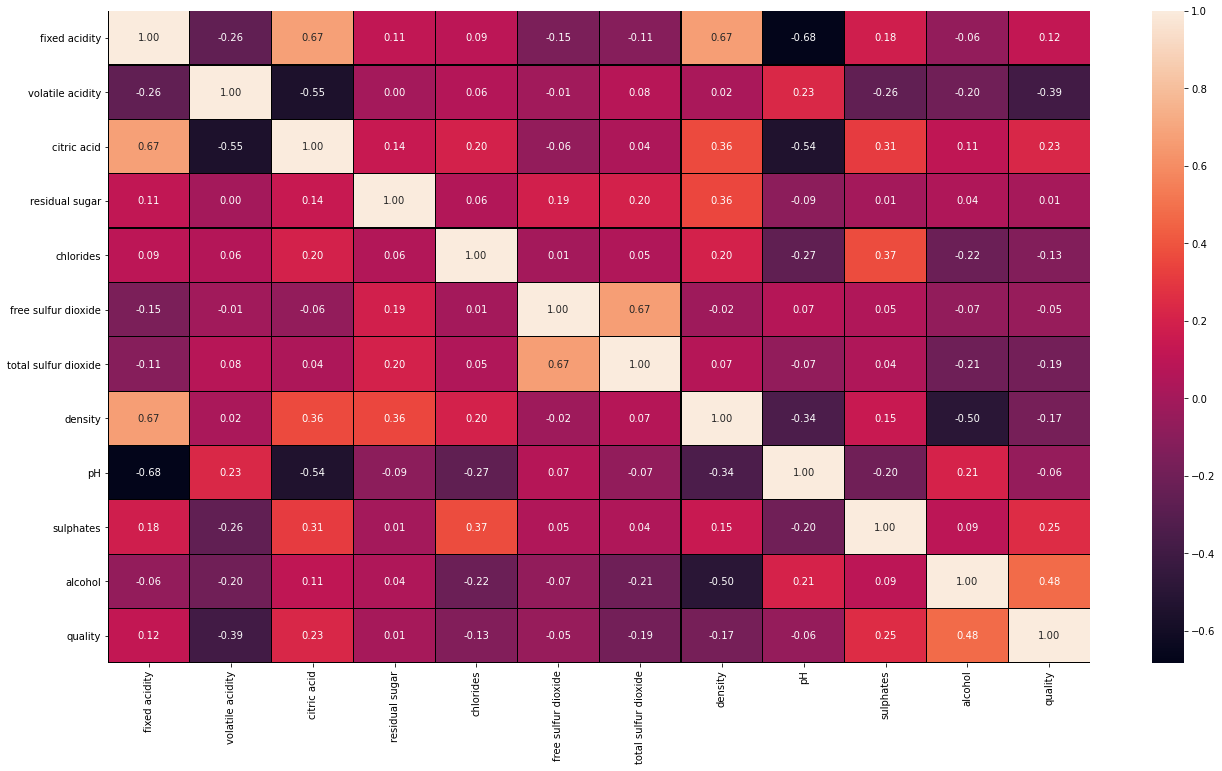

In [103]:
# Plotting Heatmap
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(), annot=True,linewidths=0.1,linecolor='black',fmt='.2f')
plt.show()

In [104]:
df['quality'].value_counts()  # counting number of quality 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [105]:
corr_matrix=df.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

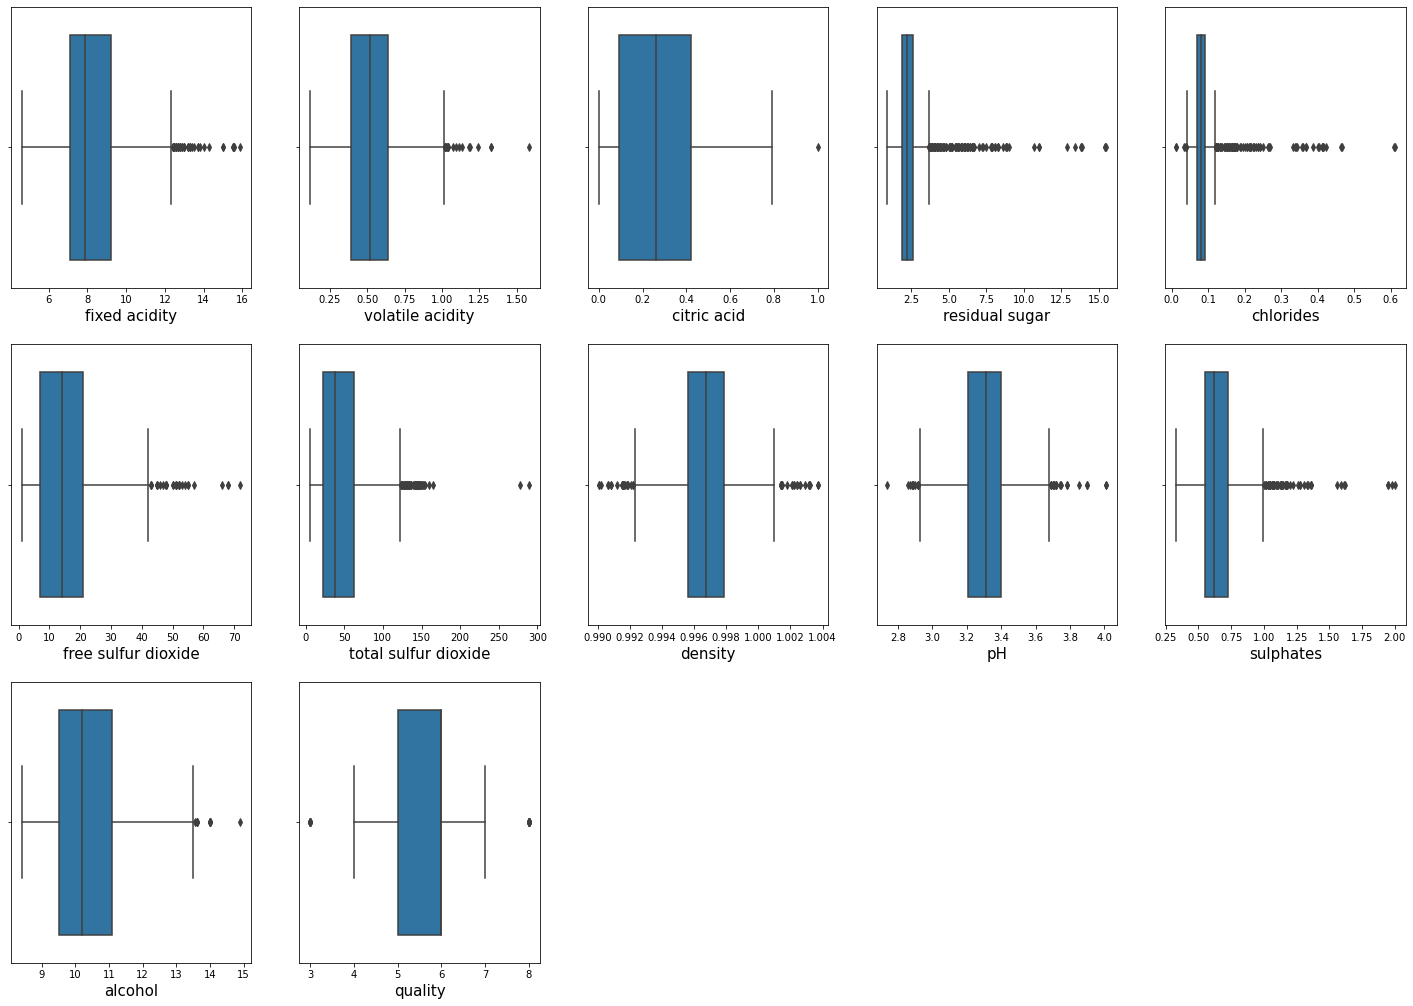

In [106]:
# Checking outliers
plt.figure(figsize=(25,30))
plot=1
for column in df:
    if plot<15:
        ax=plt.subplot(5,5,plot)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    
    plot+=1
plt.show()

In [107]:
# oultier removal
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1599, 12)

In [108]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [109]:
df_new=df[(z<3).all(axis=1)]
print('Old DataFrame',df.shape)
print('New DataFrame',df_new.shape)
print('total_dropped_rows',df.shape[0]-df_new.shape[0])

Old DataFrame (1599, 12)
New DataFrame (1451, 12)
total_dropped_rows 148


In [110]:
x=df.drop('quality',axis=1)
y=df.quality

In [111]:
x.skew()   # checking the skewness

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

###### skewness in dataset,so it needs to be removed using power transform

In [112]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)


In [113]:
df_new.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

In [114]:
x=df_new
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800


In [137]:
df['quality_good'] = [1 if x>=7 else 0 for x in df['quality']]
df['quality_good'].value_counts()
# df

0    1382
1     217
Name: quality_good, dtype: int64

In [138]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [139]:
# x = df.iloc[:,:11]
# y = df.iloc[:,11]

# # determining the shape of x and y.
# print(x.shape)
# print(y.shape)
x=df.drop(['quality','quality_good'],axis=1)
y=df.quality_good

In [117]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [118]:
# dividing the dataset in training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 454755)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

# creating the model
LR = LogisticRegression()

# feeding the training set into the model
LR.fit(x_train, y_train)

# predicting the results for the test set
y_pred = LR.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", LR.score(x_train, y_train))
print("Testing accuracy :", LR.score(x_test, y_test))
print('Accuracy', accuracy_score(y_test,y_pred)*100)
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.8857381150959133
Testing accuracy : 0.875
Accuracy 87.5
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       345
           1       0.57      0.36      0.44        55

    accuracy                           0.88       400
   macro avg       0.74      0.66      0.69       400
weighted avg       0.86      0.88      0.86       400

[[330  15]
 [ 35  20]]


In [120]:
from sklearn.svm import SVC

# creating the model
svc = SVC()

# feeding the training set into the model
svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred1 = svc.predict(x_test)

# calculating the training and testing accuracies
# print("Training accuracy :", svc.score(x_train, y_train))
# print("Testing accuracy :", svc.score(x_test, y_test))
print('Accuracy', accuracy_score(y_test,y_pred1)*100)

Accuracy 88.5


In [121]:
from sklearn.tree import DecisionTreeClassifier

# creating model
dtc = DecisionTreeClassifier()

# feeding the training set into the model
dtc.fit(x_train, y_train)

# predicting the results for the test set
y_pred2 = dtc.predict(x_test)

# calculating the training and testing accuracies
# print("Training accuracy :", dtc.score(x_train, y_train))
# print("Testing accuracy :", dtc.score(x_test, y_test))
print('Accuracy', accuracy_score(y_test,y_pred2)*100)
# classification report
print(classification_report(y_test, y_pred2))

# confusion matrix
print(confusion_matrix(y_test, y_pred2))

Accuracy 88.25
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       345
           1       0.57      0.56      0.57        55

    accuracy                           0.88       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.88      0.88      0.88       400

[[322  23]
 [ 24  31]]


In [122]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
rf = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
rf.fit(x_train, y_train)

# predicting the results for the test set
y_pred3 = rf.predict(x_test)
print('Accuracy', accuracy_score(y_test,y_pred3)*100)

# calculating the training and testing accuracies
# print("Training accuracy :", rf.score(x_train, y_train))
# print("Testing accuracy :", rf.score(x_test, y_test))

Accuracy 90.75


In [123]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics
abc = AdaBoostClassifier(random_state=1)
abc.fit(x_train, y_train)
y_pred4 = abc.predict(x_test)
print(classification_report(y_test, y_pred4))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       345
           1       0.47      0.44      0.45        55

    accuracy                           0.85       400
   macro avg       0.69      0.68      0.68       400
weighted avg       0.85      0.85      0.85       400

Accuracy: 0.855


In [124]:

scr=cross_val_score(svc,x_scaled,y,cv=5)
print(scr.mean())

0.8692927115987461


In [125]:
DTC=cross_val_score(dtc,x_scaled,y,cv=5)
print(DTC.mean())

0.8080015673981192


In [126]:
scr=cross_val_score(rf,x_scaled,y,cv=5)
print(scr.mean())

0.8661755485893415


In [127]:
scr=cross_val_score(LR,x_scaled,y,cv=5)
print(scr.mean())

0.8674275078369906


In [128]:

scr=cross_val_score(abc,x_scaled,y,cv=5)
print(scr.mean())

0.8580387931034483


In [129]:
# finding the best parameters for the SVC model

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(SVC(), param_grid = param, scoring = 'accuracy', cv = 10)
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [130]:
grid_svc.best_params_

{'C': 1.1, 'gamma': 1.4, 'kernel': 'rbf'}

In [131]:
# print best parameter after tuning
print(grid_svc.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)

{'C': 1.1, 'gamma': 1.4, 'kernel': 'rbf'}
SVC(C=1.1, gamma=1.4)


In [132]:
grid_predictions = grid_svc.predict(x_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       345
           1       0.94      0.29      0.44        55

    accuracy                           0.90       400
   macro avg       0.92      0.64      0.69       400
weighted avg       0.90      0.90      0.88       400



we have seen that quality_good wines have high levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.

it is interpreted that above 7 there are 217 quality else 1382

 1=217      

0 =1382